In [12]:
import pandas as pd
import numpy as np
import sklearn

Exploration

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df #price is in indian rupees

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [15]:
df.duration.min()

0.83

In [12]:
df.duration.max()

49.83

In [18]:
df.duration.median()

11.25

In [ ]:
'''after exploring we know we have to:
1. drop the unnamed column and flight column
2. one_hot encode airline, source_city, departutre_time, arrival_time, destination_city
3. turning stops to numercial feature from text
4. making class as binary feature'''

Pre-processing

In [3]:
df = df.drop(["Unnamed: 0", "flight"], axis = 1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0) #binary encoding
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [5]:
df.stops = pd.factorize(df.stops)[0] #turning from text to numbers 
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [6]:
#since we are going to use a regression model we need to convert everything to numerical feature
#for this we will use get_dummies() function which splits a categorial feature into individual features
#for example using this function on airline will split it into 6 different features
pd.get_dummies(df.airline, prefix = "airline").head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [7]:
df = df.join(pd.get_dummies(df.airline, prefix = "airline")).drop("airline", axis = 1)
df = df.join(pd.get_dummies(df.source_city, prefix = "source")).drop("source_city", axis = 1)
df = df.join(pd.get_dummies(df.destination_city, prefix = "dest")).drop("destination_city", axis = 1)
df = df.join(pd.get_dummies(df.arrival_time, prefix = "arrival")).drop("arrival_time", axis = 1)
df = df.join(pd.get_dummies(df.departure_time, prefix = "dept")).drop("departure_time", axis = 1)

In [10]:
df = df.astype(int)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dept_Afternoon,dept_Early_Morning,dept_Evening,dept_Late_Night,dept_Morning,dept_Night
0,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Training Regresison Model

In [19]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = df.drop("price", axis = 1), df.price #separting the price column from df

In [26]:
x.head()

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,dept_Afternoon,dept_Early_Morning,dept_Evening,dept_Late_Night,dept_Morning,dept_Night
0,0,0,2,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [25]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int32

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
#no need to scale data for randomd_forest_regressor model
reg = RandomForestRegressor(n_jobs = -1) #n_jobs = -1: to maximize the number of processors used
reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [29]:
reg.score(x_test, y_test) #this is not accuracy but r-squared value

0.9758149993319102

In [33]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9758149993319102
MSE: 12548679.89416574
MAE: 1493.8806572108037
RMSE: 3542.4115929922286


Text(0.5, 1.0, 'Prediction vs Actual Price')

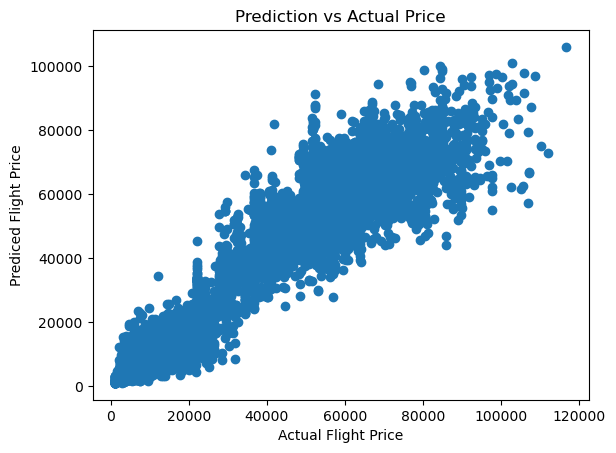

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Prediced Flight Price")
plt.title("Prediction vs Actual Price")

#this shows that model is performing decently as variance is not too large

In [37]:
#to know the importance of features and sort them from highest to lowest
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)
sorted_importances

[('class', 0.8826770558072704),
 ('duration', 0.05069859203266272),
 ('days_left', 0.020815317179787126),
 ('airline_Vistara', 0.005030765670029334),
 ('airline_Air_India', 0.0050111457223717855),
 ('source_Delhi', 0.0038870666202985367),
 ('dest_Delhi', 0.003536631866354478),
 ('source_Mumbai', 0.0022938096068274598),
 ('dest_Mumbai', 0.0020649575116569938),
 ('source_Kolkata', 0.001782050616113687),
 ('dest_Kolkata', 0.001780822297330262),
 ('stops', 0.0016831999828232514),
 ('arrival_Evening', 0.0015993916033741275),
 ('dest_Hyderabad', 0.0014832859218374343),
 ('dest_Bangalore', 0.0013607622651402047),
 ('source_Hyderabad', 0.0013489503945611334),
 ('arrival_Night', 0.0013083922260950466),
 ('source_Bangalore', 0.0012778484118117777),
 ('dept_Evening', 0.0012101968345872008),
 ('arrival_Afternoon', 0.0010827889542726885),
 ('dept_Morning', 0.0010283946083444436),
 ('source_Chennai', 0.0009855504365415637),
 ('dept_Early_Morning', 0.0009375490757865536),
 ('dept_Afternoon', 0.000888

<BarContainer object of 5 artists>

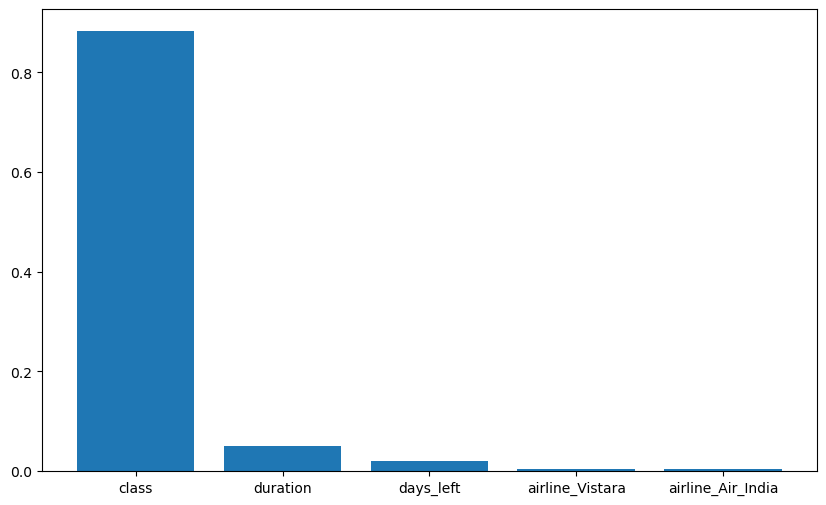

In [39]:
plt.figure(figsize = (10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

Hyperparameter Tuning: fine-tuning the parameters present in random forest regressor

Instead of doing it manually we will use an automated way by using grid search/randomized search using cross validation

In [ ]:
#grid search
from sklearn.model_selection import GridSearchCV #provide different values to try for different hyperparameters and different combinations

reg = RandomForestRegressor(n_jobs = -1) #n_jobs = -1: to maximize the number of processors used

param_grid = {
    "n_estimators" : [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split" :[2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "max_features" : ["auto", "sqrt"]
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

# this takes a lot of time to run so instead of using this we go for randomized search using cross validation 

In [42]:
#randomized search: instead of going for all the possible combinations we provide ranges that could possibly work 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators" : randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split" : randint(2, 11),
    "min_samples_leaf" : randint(1, 5),
    "max_features" : [1, "auto", "sqrt"]
}

reg = RandomForestRegressor(n_jobs = -1)

random_search = RandomizedSearchCV(estimator = reg, param_distributions = param_dist, n_iter = 2, cv = 3, scoring = "neg_mean_squared_error", 
                                   verbose = 2, random_state = 10, n_jobs = -1)

random_search.fit(x_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [43]:
best_regressor.score(x_test, y_test)

0.9707870749170229

In [44]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(x_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9707870749170229
MSE: 15157479.243827429
MAE: 2255.4665546476804
RMSE: 3893.2607469610134


Text(0.5, 1.0, 'Prediction vs Actual Price')

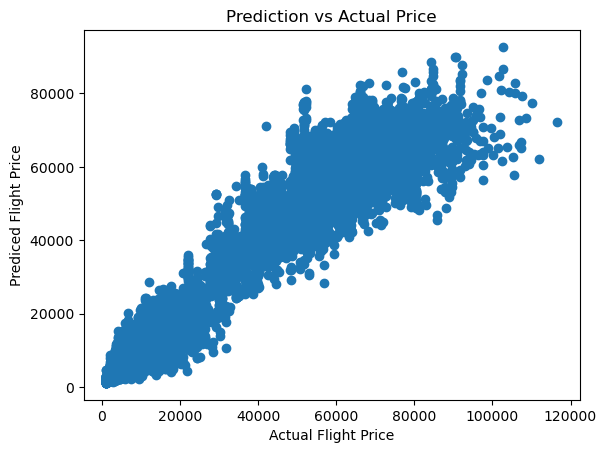

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Prediced Flight Price")
plt.title("Prediction vs Actual Price")


In [ ]:
#even after hyperparameter tuning the model seems to have been the same but using more comprehensive grid search or randomized search can yield better results